In [15]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Note: All calculations can be performed *before* load().  
## Plots require load() but can plot subset of data as a test

In [5]:
# #single data set example
# ds=xr.open_dataset('/g/data/oe9/project/team-drip/h30v12_reflectance_2001.nc')
# ds

<xarray.Dataset>
Dimensions:          (time: 92, x: 2400, y: 1680)
Coordinates:
  * time             (time) datetime64[ns] 2001-01-01 2001-01-05 2001-01-09 ...
  * x                (x) float64 1.334e+07 1.334e+07 1.334e+07 1.334e+07 ...
  * y                (y) float64 -3.336e+06 -3.336e+06 -3.337e+06 -3.337e+06 ...
Data variables:
    red_630_690      (time, y, x) float32 ...
    nir1_780_900     (time, y, x) float32 ...
    blue_450_520     (time, y, x) float32 ...
    green_530_610    (time, y, x) float32 ...
    nir2_1230_1250   (time, y, x) float32 ...
    swir1_1550_1750  (time, y, x) float32 ...
    swir2_2090_2350  (time, y, x) float32 ...

In [4]:
# # NOTE: better just to pass a shell pattern to mfdataset
# # create file list
# year=range(2001,2018)
# fnames=[]
# for y in year:
#     fnames.append('/g/data/oe9/project/team-drip/h30v12_reflectance_{}.nc'.format(y))
# print(fnames)


['/g/data/oe9/project/team-drip/h30v12_reflectance_2001.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2002.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2003.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2004.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2005.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2006.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2007.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2008.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2009.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2010.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2011.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2012.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2013.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2014.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2015.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2016.nc', '/g/data/oe9/project/team-drip/h30v12_r

In [8]:
ds_all=xr.open_mfdataset(
    '/g/data/oe9/project/team-drip/h30v12_reflectance_????.nc',
    chunks=dict(time=12, x=1200), #chunks should be in multiples of saved chunk size
)
ds_all

<xarray.Dataset>
Dimensions:          (time: 1564, x: 2400, y: 1680)
Coordinates:
  * x                (x) float64 1.334e+07 1.334e+07 1.334e+07 1.334e+07 ...
  * y                (y) float64 -3.336e+06 -3.336e+06 -3.337e+06 -3.337e+06 ...
  * time             (time) datetime64[ns] 2001-01-01 2001-01-05 2001-01-09 ...
Data variables:
    red_630_690      (time, y, x) float32 dask.array<shape=(1564, 1680, 2400), chunksize=(12, 1680, 1200)>
    nir1_780_900     (time, y, x) float32 dask.array<shape=(1564, 1680, 2400), chunksize=(12, 1680, 1200)>
    blue_450_520     (time, y, x) float32 dask.array<shape=(1564, 1680, 2400), chunksize=(12, 1680, 1200)>
    green_530_610    (time, y, x) float32 dask.array<shape=(1564, 1680, 2400), chunksize=(12, 1680, 1200)>
    nir2_1230_1250   (time, y, x) float32 dask.array<shape=(1564, 1680, 2400), chunksize=(12, 1680, 1200)>
    swir1_1550_1750  (time, y, x) float32 dask.array<shape=(1564, 1680, 2400), chunksize=(12, 1680, 1200)>
    swir2_2090_2350  (

In [31]:
ds_all.nbytes/10**9

176.569389152

In [28]:
#Note: Do not need to subset data until ready to plot.
#Subset data method 1 (by limiting spatially)
# This indicates "no start point, no end point, one pixel per 25" - plenty for example charts
zoom = slice(None, None, 25)
# Select every 25th point of lat and lon, and the 0th (first) time step
ds_lr = ds_all.sel(y=zoom, x=zoom)
ds_lr.nbytes/10**9


0.285888

In [35]:
#subset data method 2 (by limiting tmeporally)
some = ds_all.isel(time=slice(-32, None)) #select last 32 time steps.
some

<xarray.Dataset>
Dimensions:          (time: 32, x: 2400, y: 1680)
Coordinates:
  * x                (x) float64 1.334e+07 1.334e+07 1.334e+07 1.334e+07 ...
  * y                (y) float64 -3.336e+06 -3.336e+06 -3.337e+06 -3.337e+06 ...
  * time             (time) datetime64[ns] 2017-08-29 2017-09-02 2017-09-06 ...
Data variables:
    red_630_690      (time, y, x) float32 dask.array<shape=(32, 1680, 2400), chunksize=(12, 1680, 1200)>
    nir1_780_900     (time, y, x) float32 dask.array<shape=(32, 1680, 2400), chunksize=(12, 1680, 1200)>
    blue_450_520     (time, y, x) float32 dask.array<shape=(32, 1680, 2400), chunksize=(12, 1680, 1200)>
    green_530_610    (time, y, x) float32 dask.array<shape=(32, 1680, 2400), chunksize=(12, 1680, 1200)>
    nir2_1230_1250   (time, y, x) float32 dask.array<shape=(32, 1680, 2400), chunksize=(12, 1680, 1200)>
    swir1_1550_1750  (time, y, x) float32 dask.array<shape=(32, 1680, 2400), chunksize=(12, 1680, 1200)>
    swir2_2090_2350  (time, y, x) fl

In [29]:
#rename vars for simple calcs
blue = ds_all.blue_450_520
green = ds_all.green_530_610
red = ds_all.red_630_690
nir1 = ds_all.nir1_780_900
nir2 = ds_all.nir2_1230_1250

In [30]:
ndvi = (nir1 - red) / (nir1 + red)
ndvi

<xarray.DataArray (time: 1564, y: 1680, x: 2400)>
dask.array<shape=(1564, 1680, 2400), dtype=float32, chunksize=(12, 1680, 1200)>
Coordinates:
  * x        (x) float64 1.334e+07 1.334e+07 1.334e+07 1.334e+07 1.335e+07 ...
  * y        (y) float64 -3.336e+06 -3.336e+06 -3.337e+06 -3.337e+06 ...
  * time     (time) datetime64[ns] 2001-01-01 2001-01-05 2001-01-09 ...

In [31]:
# Using the MODIS-EVI coefficients
L, C1, C2, G = 1, 6, 7.5, 2.5
EVI = G * ((nir1 - red) / (nir1 + C1 * red - C2 * blue + L))
EVI

<xarray.DataArray (time: 1564, y: 1680, x: 2400)>
dask.array<shape=(1564, 1680, 2400), dtype=float32, chunksize=(12, 1680, 1200)>
Coordinates:
  * x        (x) float64 1.334e+07 1.334e+07 1.334e+07 1.334e+07 1.335e+07 ...
  * y        (y) float64 -3.336e+06 -3.336e+06 -3.337e+06 -3.337e+06 ...
  * time     (time) datetime64[ns] 2001-01-01 2001-01-05 2001-01-09 ...

In [13]:
%%time
## download subset for plotting purposes
first = ndvi.isel(time=0)
first.load()

CPU times: user 2.24 s, sys: 762 ms, total: 3 s
Wall time: 5.11 s


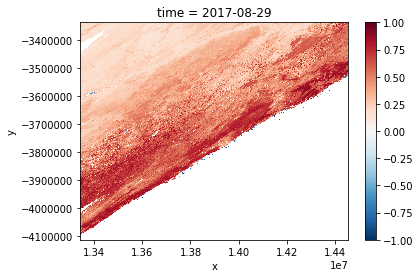

In [17]:
first.plot.imshow()

In [34]:
ndvi.nbytes/10**9

25.224192

In [36]:
seasonal = some.red_630_690.groupby('time.month').mean(dim='time').load()

/g/data/oe9/software/anaconda/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


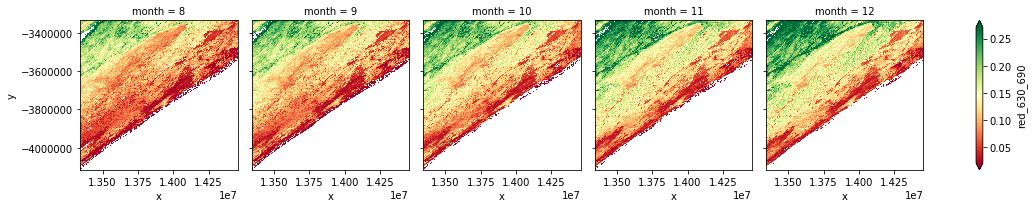

In [37]:
seasonal.plot.imshow(col='month', robust=True, cmap='RdYlGn')

help needed:

reprojecting modis, don't have osgeo module

is there a way to load subset of data once?\


Text(0.5,1,'h30v12')

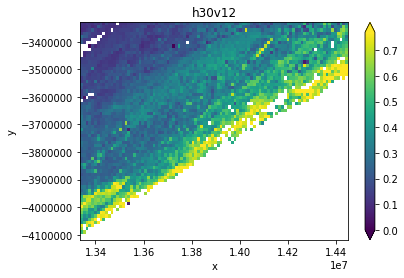

In [20]:
ndvi.plot.imshow(robust=True, vmin=0)
plt.title('h30v12')

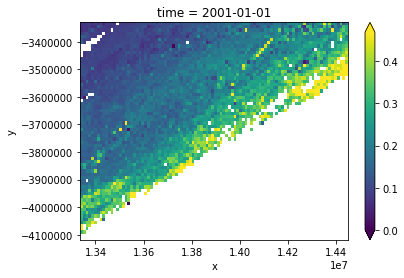

In [13]:
EVI.plot.imshow(robust=True, vmin=0)